In [31]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [32]:
data = pd.read_csv('gender.csv')

In [33]:
print(data.columns)

Index(['Name', 'Gender', 'Count', 'Probability'], dtype='object')


In [34]:
data['Name'] = data['Name'].str.lower()

In [35]:
def name_to_vector(name, max_len=15):
    vector = np.zeros(max_len)
    for i, char in enumerate(name):
        if i < max_len:
            vector[i] = ord(char) - ord('a') + 1
    return vector

In [36]:
name_vectors = np.array([name_to_vector(name) for name in data['Name']])

In [37]:
kmeans = KMeans(n_clusters=2, random_state=70)
kmeans.fit(name_vectors)

KMeans(n_clusters=2, random_state=70)

In [38]:
clusters = kmeans.labels_

In [39]:
data['cluster'] = clusters

In [40]:
print(data['cluster'].value_counts())

cluster
1    145699
0      1570
Name: count, dtype: int64


In [41]:
print(data.head(10))

      Name Gender    Count  Probability  cluster
0    james      M  5304407     0.014517        1
1     john      M  5260831     0.014398        1
2   robert      M  4970386     0.013603        1
3  michael      M  4579950     0.012534        1
4  william      M  4226608     0.011567        1
5     mary      F  4169663     0.011411        1
6    david      M  3787547     0.010366        1
7   joseph      M  2695970     0.007378        1
8  richard      M  2638187     0.007220        1
9  charles      M  2433540     0.006660        1


In [42]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(name_vectors)

In [43]:
data['pca1'] = reduced_vectors[:, 0]
data['pca2'] = reduced_vectors[:, 1]

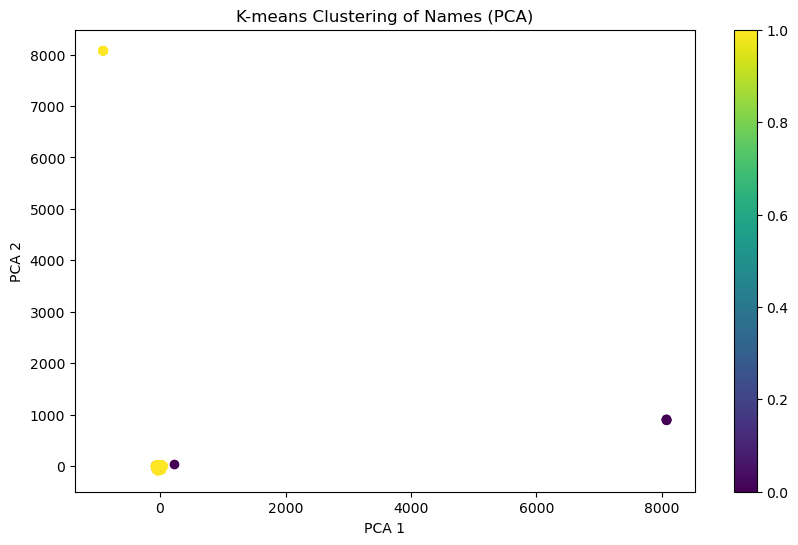

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(data['pca1'], data['pca2'], c=data['cluster'], cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('K-means Clustering of Names (PCA)')
plt.colorbar()
plt.show()